# Musterbeispiel Data Processing

Notwendige Packages befinden sich in `requirements.txt` - installieren mit `pip install -r requirements.txt`.

Die Verwendung eines Virtual Environments (venv) wird empfohlen (`py -m venv .venv`, dann `.venv/scripts/activate` bzw. `.venv/bin/activate`)

In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

## Beschreibung des Datensatzes

- Datensatz beinhaltet Daten der Wetterstation Freiburg des Deutschen Wetterdienstes
- Datensatz ist csv mit Trennzeichen `;`
- Datensatz umfasst 6 Spalten:


|                    | STATIONS_ID           | MESS_DATUM                   | QN_4                 | TT_TER                | RF_TER                     | eor        |
|--------------------|-----------------------|------------------------------|----------------------|-----------------------|----------------------------|------------|
| Beschreibung       | ID der Wetterstation  | Datum und Stunde der Messung | Qualität der Messung | Temperatur            | Relative Luftfeutchtigkeit | End of Row |
| Datentyp           | Integer               | String (Format yyyymmddhh)   | Integer              | Float                 | Float                      | String     |
| Fehlende Einträge  | Nein                  | Nein                         | Nein                 | Ja (-999)             | Ja  (-999)                 | Nein       |
| Relevant           | Nein                  | Ja                           | Teilweise            | Ja                    | Ja                         | Nein       |


## Schritte der Datenverarbeitung

1. Einlesen des Datensatzes
2. Konvertierung der Datumsspalte in datetime objekte
3. Entfernen nicht benötigter Spalten
4. Plotten der Daten für bessere Übersicht
5. Identifizieren und kompensieren von Fehlerwerten durch Interpolation
6. Plotten des Ergebnisses

In [2]:
# Einlesen der Wetterdaten. Diese müssen sich im selben ordner wie dieses Notebook befinden
datafile = pathlib.Path() / "wetterdaten_freiburg_2022_2024.csv"
data = pd.read_csv(datafile, sep=";")

# Struktur des pandas dataframes ausgeben
data.describe()

STATIONS_ID    MESS_DATUM         QN_4       TT_TER       RF_TER
count       1939.0  1.939000e+03  1939.000000  1939.000000  1939.000000
mean        1443.0  2.023268e+09     5.121712    -1.439144    58.563177
std            0.0  5.373317e+05     3.262451   114.311663   122.156135
min         1443.0  2.022111e+09     1.000000  -999.000000  -999.000000
25%         1443.0  2.023042e+09     3.000000     6.200000    59.000000
50%         1443.0  2.023092e+09     3.000000    10.900000    74.000000
75%         1443.0  2.024012e+09     9.000000    16.600000    87.000000
max         1443.0  2.024052e+09     9.000000    34.300000   100.000000

In [3]:
# Datumswerte konvertieren
data["MESS_DATUM"] = pd.to_datetime(data["MESS_DATUM"], format="%Y%m%d%H")

# Nicht benötigte Spalten entfernen
data.drop(["STATIONS_ID", "QN_4", "eor"], axis=1, inplace=True)

# Struktur des pandas dataframes ausgeben
data.describe()

MESS_DATUM       TT_TER       RF_TER
count                           1939  1939.000000  1939.000000
mean   2023-09-03 09:01:23.548220672    -1.439144    58.563177
min              2022-11-13 06:00:00  -999.000000  -999.000000
25%              2023-04-23 15:00:00     6.200000    59.000000
50%              2023-09-16 12:00:00    10.900000    74.000000
75%              2024-01-15 15:00:00    16.600000    87.000000
max              2024-05-15 18:00:00    34.300000   100.000000
std                              NaN   114.311663   122.156135

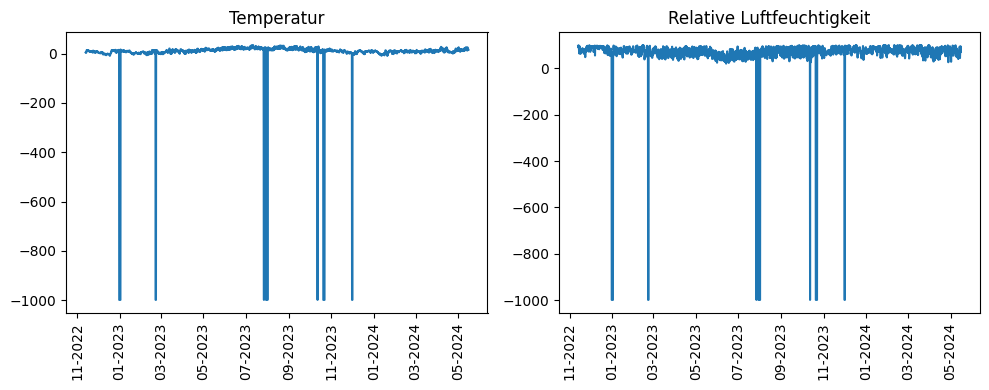

In [4]:
# Daten plotten (Temperatur und Luftfeuchtigkeit)
fig = plt.figure(figsize=(10, 4))
ax = plt.subplot(1, 2, 1)
ax.plot(data["MESS_DATUM"], data["TT_TER"])
ax.set_title("Temperatur")
monthyearFmt = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

ax = plt.subplot(1, 2, 2)
ax.plot(data["MESS_DATUM"], data["RF_TER"])
ax.set_title("Relative Luftfeuchtigkeit")
monthyearFmt = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [5]:
# Fehlerwerte vereinheitlichen
data.replace(-999, np.nan, inplace=True)

# Fehlende Werte durch Interpolation ersetzen
data["TT_TER"] = data["TT_TER"].interpolate()
data["RF_TER"] = data["RF_TER"].interpolate()

# Struktur des pandas dataframes ausgeben
data.describe()

MESS_DATUM       TT_TER       RF_TER
count                           1939  1939.000000  1939.000000
mean   2023-09-03 09:01:23.548220672    11.634683    72.296029
min              2022-11-13 06:00:00    -9.100000    20.000000
25%              2023-04-23 15:00:00     6.500000    60.000000
50%              2023-09-16 12:00:00    11.100000    75.000000
75%              2024-01-15 15:00:00    16.700000    87.000000
max              2024-05-15 18:00:00    34.300000   100.000000
std                              NaN     7.940810    17.596512

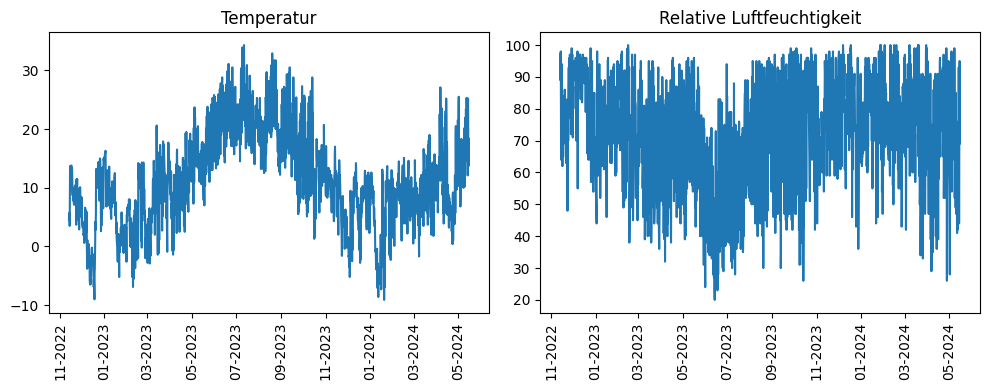

In [6]:
# Überarbeitete Daten plotten (Temperatur und Luftfeuchtigkeit)
fig = plt.figure(figsize=(10, 4))
ax = plt.subplot(1, 2, 1)
ax.plot(data["MESS_DATUM"], data["TT_TER"])
ax.set_title("Temperatur")
monthyearFmt = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

ax = plt.subplot(1, 2, 2)
ax.plot(data["MESS_DATUM"], data["RF_TER"])
ax.set_title("Relative Luftfeuchtigkeit")
monthyearFmt = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)

plt.tight_layout()
plt.show()